## <u> Implementing Multiple Linear Regression </u>

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# dataset = https://docs.google.com/spreadsheets/d/12O4HQdj6anuyMNx011YFKyNVW8m-o3iHvqrqKrAZ5sg/edit?usp=sharing

In [4]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [5]:
len(dataset)

50

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.shape

(50, 5)

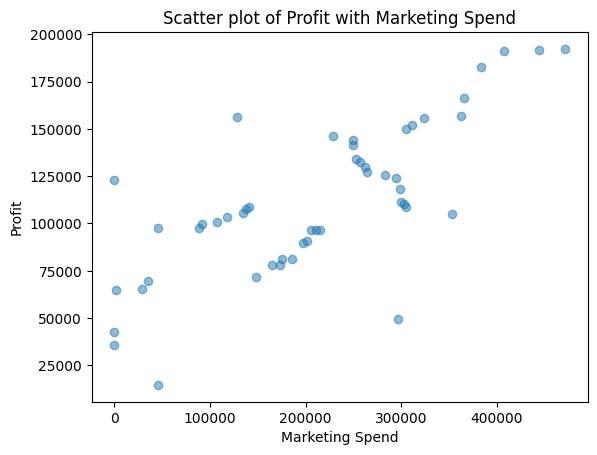

In [8]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

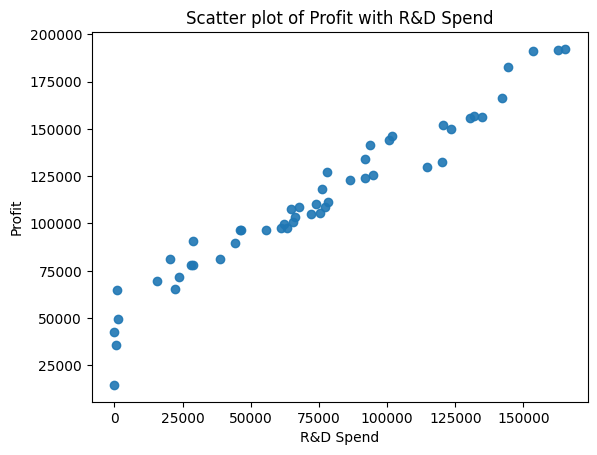

In [9]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.9)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

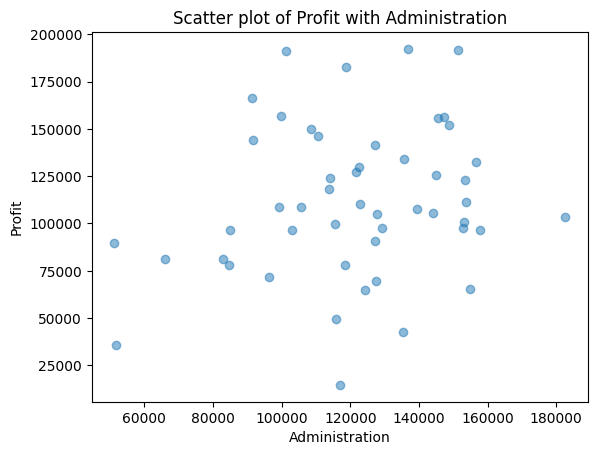

In [10]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

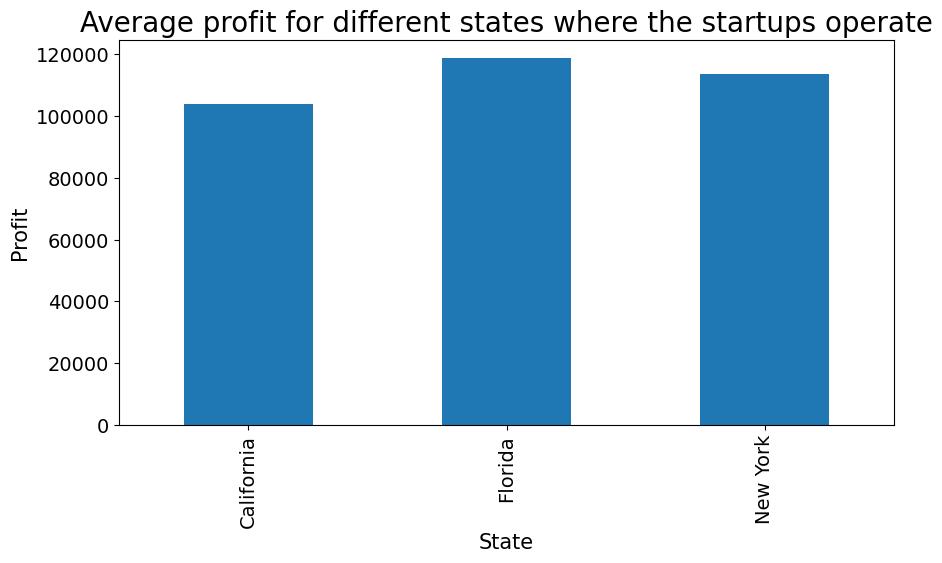

In [11]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [12]:
dataset.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [13]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [14]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [15]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.039068,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,0.005145,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.033670,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,0.031368,-0.145837,0.116244
NewYork_State,0.039068,0.005145,-0.033670,0.031368,1.000000,-0.515152,-0.492366
California_State,-0.143165,-0.015478,-0.168875,-0.145837,-0.515152,1.000000,-0.492366
Florida_State,0.105711,0.010493,0.205685,0.116244,-0.492366,-0.492366,1.000000


In [16]:
#  Linear relatioship
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Extract the correlation of each feature with Profit
profit_correlation = correlation_matrix['Profit']

# Print the correlation of each feature with Profit
print(profit_correlation)

R&D Spend           0.972900
Administration      0.200717
Marketing Spend     0.747766
Profit              1.000000
NewYork_State       0.031368
California_State   -0.145837
Florida_State       0.116244
Name: Profit, dtype: float64


In [17]:
# No or little Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = dataset.drop(columns=['Profit', 'NewYork_State', 'California_State', 'Florida_State'])


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]


# Print the VIF for each feature
vif_data


,Feature,VIF
0,R&D Spend,8.384571
1,Administration,4.026406
2,Marketing Spend,7.593984


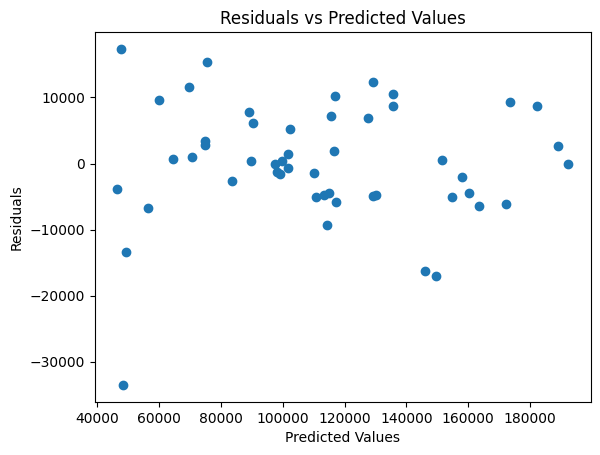

In [18]:
# Homoscedasticity - constant variance

# Separate features and target variable
X = dataset.drop(columns=['Profit'])  # Features
Y = dataset['Profit']  # Target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Obtain residuals
residuals = Y - model.predict(X)

# Plot residuals against predicted values
plt.scatter(model.predict(X), residuals)
# plt.axhline( color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


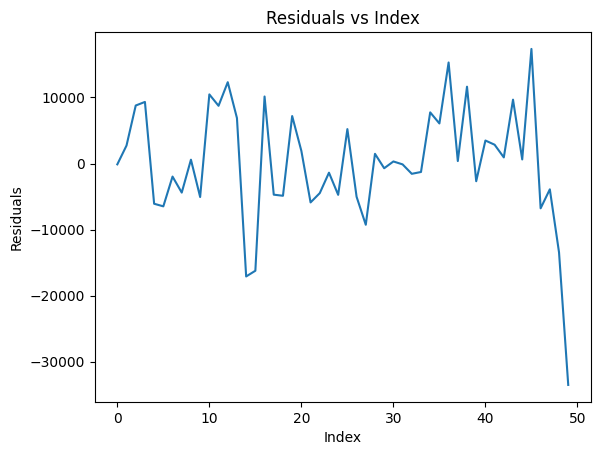

In [19]:
# No Autocorrelation of errors
# Plot residuals against index
plt.plot(residuals.index, residuals)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals vs Index")
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

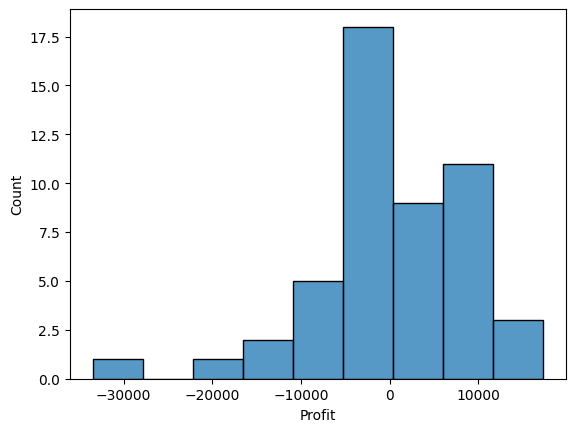

In [20]:
# Residual Normality

import seaborn as sns
sns.histplot(residuals)

In [21]:
dependent_variable = 'Profit'

In [22]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [23]:
independent_variables

['Administration',
 'Florida_State',
 'Marketing Spend',
 'R&D Spend',
 'California_State',
 'NewYork_State']

In [24]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [25]:
X

array([[1.3689780e+05, 0.0000000e+00, 4.7178410e+05, 1.6534920e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.5137759e+05, 0.0000000e+00, 4.4389853e+05, 1.6259770e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0114555e+05, 1.0000000e+00, 4.0793454e+05, 1.5344151e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.1867185e+05, 0.0000000e+00, 3.8319962e+05, 1.4437241e+05,
        0.0000000e+00, 1.0000000e+00],
       [9.1391770e+04, 1.0000000e+00, 3.6616842e+05, 1.4210734e+05,
        0.0000000e+00, 0.0000000e+00],
       [9.9814710e+04, 0.0000000e+00, 3.6286136e+05, 1.3187690e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.4719887e+05, 0.0000000e+00, 1.2771682e+05, 1.3461546e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.4553006e+05, 1.0000000e+00, 3.2387668e+05, 1.3029813e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.4871895e+05, 0.0000000e+00, 3.1161329e+05, 1.2054252e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0867917e+05, 0.0000000e+00,

In [26]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [28]:
X_train.shape

(40, 6)

In [29]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train[0:10]

array([[0.54429273, 1.        , 0.64291963, 0.4475048 , 0.        ,
        0.        ],
       [0.78021012, 0.        , 0.63532724, 0.47408436, 0.        ,
        1.        ],
       [0.51204073, 0.        , 0.36626005, 0.17390063, 1.        ,
        0.        ],
       [0.43692884, 0.        , 0.64644319, 0.74590551, 1.        ,
        0.        ],
       [0.70684477, 1.        , 0.28413435, 0.45557444, 0.        ,
        0.        ],
       [0.3694479 , 0.        , 0.76912588, 0.797566  , 0.        ,
        1.        ],
       [0.11163611, 0.        , 0.39269043, 0.12234465, 0.        ,
        1.        ],
       [0.3653876 , 0.        , 0.29796428, 0.46594728, 0.        ,
        1.        ],
       [1.        , 1.        , 0.25042853, 0.39946683, 0.        ,
        0.        ],
       [0.74173276, 0.        , 0.66049977, 0.72901786, 0.        ,
        1.        ]])

In [31]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
regressor.intercept_

np.float64(47170.78517445782)

In [33]:
regressor.coef_

array([-5.26545315e+03,  1.29314383e+02,  1.72428268e+04,  1.31796878e+05,
        2.08532522e+02, -3.37846905e+02])

In [34]:
y_pred_train = regressor.predict(X_train)

In [35]:
y_train

array([110352.25, 111313.02,  78239.91, 149759.96, 105733.54, 156991.12,
        81229.06, 108552.04, 103282.38, 152211.77,  97483.56,  71498.49,
        81005.76,  90708.19,  99937.59, 166187.94,  65200.33, 129917.04,
       144259.4 , 192261.83, 134307.35, 132602.65, 105008.31, 156122.51,
       126992.93,  49490.75,  35673.41, 124266.9 ,  96479.51, 191792.06,
       155752.6 , 182901.99, 125370.37, 191050.39, 108733.99, 141585.52,
        42559.73,  64926.08,  14681.4 ,  89949.14])

In [36]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [37]:
#Predicted profit on the test data
y_pred

array([ 74204.24896079, 116566.94205365,  96481.75206871,  57440.67122773,
       134531.20435249,  98963.15266496,  97302.53943633, 100426.50977313,
        87823.65877003, 111618.76401954])

In [38]:
# Actual profits on test data
y_test

array([ 77798.83, 118474.03,  97427.84,  69758.98, 146121.95, 101004.64,
        96778.92, 107404.34,  96712.8 , 122776.86])

In [39]:
mean_squared_error(y_test, y_pred)

56019109.55742572

In [40]:
# Train performance
# root_mean_squared_error(y_train, y_pred_train)

In [41]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

9331.839905786177

In [42]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

7484.591475653546

In [43]:
r2_score(y_train, y_pred_train)

0.9531320407149488

In [44]:
r2_score(y_test, y_pred)

0.8715447367658178

In [45]:
from sklearn.linear_model import SGDRegressor

# Define your initial learning rate and other parameters
initial_learning_rate = 0.01
power_t = 0.25  # Exponent controlling the inverse scaling

# Create a SGDRegressor object with learning rate decay
regressor = SGDRegressor(learning_rate='invscaling', eta0=initial_learning_rate, power_t=power_t)

# learning rate= eta0/(t+power_t)



# Fit the model to the training data
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [46]:
from sklearn.preprocessing import PolynomialFeatures


# Assuming X_train and y_train are your training data
# X_train should be a 2D array with shape (n_samples, n_features)
# y_train should be a 1D array with shape (n_samples,)


# Create a PolynomialFeatures object with the desired degree
poly_features = PolynomialFeatures(degree=2)

# Transform the input features to polynomial features
poly_features.fit(X_train)
X_poly = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the polynomial features
regressor.fit(X_poly, y_train)

# Make predictions on the training data
y_pred = regressor.predict(X_poly_test)


mean_squared_error(y_test, y_pred)

122071072.74349108

In [47]:
X_poly.shape

(40, 28)

In [48]:
X_train.shape

(40, 6)

In [49]:
y_pred

array([ 89272.5297076 , 118118.29876286,  88688.16068159,  68463.92783449,
       133493.15303304, 105312.09296477, 106083.73289929, 100413.78073529,
        79327.52019186, 102898.65174991])

In [50]:
math.sqrt(mean_squared_error(y_test, y_pred))

11048.577860679223

In [51]:
X_poly[0]

array([1.        , 0.54429273, 1.        , 0.64291963, 0.4475048 ,
       0.        , 0.        , 0.29625457, 0.54429273, 0.34993648,
       0.24357361, 0.        , 0.        , 1.        , 0.64291963,
       0.4475048 , 0.        , 0.        , 0.41334565, 0.28770962,
       0.        , 0.        , 0.20026054, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [52]:
X_train[0]

array([0.54429273, 1.        , 0.64291963, 0.4475048 , 0.        ,
       0.        ])

In [53]:
len(regressor.coef_)

28